In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [12]:
dataset = pd.read_csv('Flight-Delay.csv')

In [13]:
col = ['Unnamed: 0','FlightDate','time_y','date','primary','Origin','Dest','time_x','airports','ArrTime','CRSArrTime']

In [14]:
dataset.drop(col,axis=1,inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851433 entries, 0 to 1851432
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   OriginAirportID  int64  
 5   DestAirportID    int64  
 6   CRSDepTime       int64  
 7   DepTime          float64
 8   DepDelayMinutes  float64
 9   DepDel15         float64
 10  ArrDelayMinutes  float64
 11  ArrDel15         float64
 12  windspeedKmph    int64  
 13  winddirDegree    int64  
 14  weatherCode      int64  
 15  precipMM         float64
 16  visibility       int64  
 17  pressure         int64  
 18  cloudcover       int64  
 19  DewPointF        int64  
 20  WindGustKmph     int64  
 21  tempF            int64  
 22  WindChillF       int64  
 23  humidity         int64  
dtypes: float64(6), int64(18)
memory usage: 339.0 MB


In [16]:
dataset.shape

(1851433, 24)

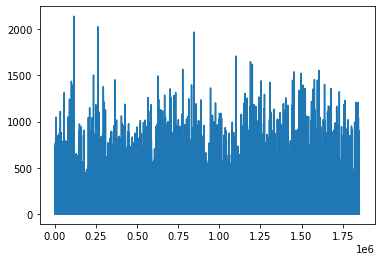

In [17]:
plt.plot(dataset['ArrDelayMinutes'])
plt.show()

In [18]:
dataset = dataset[dataset['ArrDel15'] == 1]
dataset.drop('ArrDel15',axis=1,inplace=True)
X = dataset.drop('ArrDelayMinutes',axis=1)
Y = dataset['ArrDelayMinutes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [19]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print('RMSE: ',np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R Square: ',r2_score(Y_test,Y_pred))
print('MAE: ',mean_absolute_error(Y_test, Y_pred))

RMSE:  16.86509052185185
R Square:  0.9446418993784118
MAE:  11.65600222643705


In [22]:
y_set = Y_test
X_test['ArrDelayMinutes'] = Y_test
x_set = X_test

C:\Users\Vedanth.LAPTOP-MHC2LDIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
x_set1 = x_set.loc[:][(x_set['ArrDelayMinutes'] >= 15) & (x_set['ArrDelayMinutes'] < 90)]
y_set1 = y_set[(y_set >= 15) & (y_set < 90)]

x_set2 = x_set.loc[:][(x_set['ArrDelayMinutes'] >= 90) & (x_set['ArrDelayMinutes'] < 200)]
y_set2 = y_set[(y_set >= 90) & (y_set < 200)]

x_set3 = x_set.loc[:][(x_set['ArrDelayMinutes'] >= 200) & (x_set['ArrDelayMinutes'] < 400)]
y_set3 = y_set[(y_set >= 200) & (y_set < 400)]

x_set4 = x_set.loc[:][(x_set['ArrDelayMinutes'] >= 400) & (x_set['ArrDelayMinutes'] < 1000)]
y_set4 = y_set[(y_set >= 400) & (y_set < 1000)]

x_set5 = x_set.loc[:][(x_set['ArrDelayMinutes'] >= 1000) & (x_set['ArrDelayMinutes'] < 2150)]
y_set5 = y_set[(y_set >= 1000) & (y_set < 2150)]


In [79]:
x_set1.drop('ArrDelayMinutes',axis=1,inplace=True)
x_set2.drop('ArrDelayMinutes',axis=1,inplace=True)
x_set3.drop('ArrDelayMinutes',axis=1,inplace=True)
x_set4.drop('ArrDelayMinutes',axis=1,inplace=True)
x_set5.drop('ArrDelayMinutes',axis=1,inplace=True)

In [74]:
y_pred = model.predict(x_set1)
print('RMSE: ',np.sqrt(mean_squared_error(y_set1,y_pred)))
print('R Square: ',r2_score(y_set1,y_pred))
print('MAE: ',mean_absolute_error(y_set1, y_pred))

RMSE:  13.16933761178283
R Square:  0.5531008883176016
MAE:  10.112004047990164


In [75]:
y_pred = model.predict(x_set2)
print('RMSE: ',np.sqrt(mean_squared_error(y_set2,y_pred)))
print('R Square: ',r2_score(y_set2,y_pred))
print('MAE: ',mean_absolute_error(y_set2, y_pred))

RMSE:  26.284492878178227
R Square:  0.21940352807206487
MAE:  17.616673526325858


In [76]:
y_pred = model.predict(x_set3)
print('RMSE: ',np.sqrt(mean_squared_error(y_set3,y_pred)))
print('R Square: ',r2_score(y_set3,y_pred))
print('MAE: ',mean_absolute_error(y_set3, y_pred))

RMSE:  30.494132217550735
R Square:  0.6260134154756455
MAE:  19.38835230767729


In [73]:
y_pred = model.predict(x_set4)
print('RMSE: ',np.sqrt(mean_squared_error(y_set4,y_pred)))
print('R Square: ',r2_score(y_set4,y_pred))
print('MAE: ',mean_absolute_error(y_set4, y_pred))

RMSE:  27.42140540589271
R Square:  0.9735926435060447
MAE:  18.38757234941889


In [80]:
y_pred = model.predict(x_set5)
print('RMSE: ',np.sqrt(mean_squared_error(y_set5,y_pred)))
print('R Square: ',r2_score(y_set5,y_pred))
print('MAE: ',mean_absolute_error(y_set5, y_pred))

RMSE:  49.45004715321181
R Square:  0.9447501252364593
MAE:  25.38817347270661
